# Trabalho 1

##### Aluno: Leodécio Braz
##### Ra: 230219

### Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import cv2

from scipy import signal
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity

#### Filtros


In [2]:
h1 = np.array([[0,0,-1,0,0],
               [0,-1,-2,-1,0],
               [-1,-2,16,-2,-1],
               [0,-1,-2,-1,0],
               [0,0,-1,0,0]])

h2 = (1/256) * np.array([[1,4,6,4,1],
                         [4,16,24,16,4],
                         [6,24,36,24,6],
                         [4,16,24,16,4],
                         [1,4,6,4,1]])

h3 = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

h4 = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])

filtros = (("h1",h1),
           ("h2",h2),
           ("h3",h3),
           ("h4",h4))

#### Imagens

In [3]:
img1 = cv2.imread('./images/baboon.png',0)
img2 = cv2.imread('./images/butterfly.png',0)
img3 = cv2.imread('./images/city.png',0)
img4 = cv2.imread('./images/house.png',0)
img5 = cv2.imread('./images/seagull.png',0)


#dicionario com nome e'referência para imagem'
images = {"baboon":img1,
          "butterfly":img2,
          "city":img3,
          "house":img4,
          "seagull":img5}

### Funções auxiliares

In [4]:
#realiza rotação em um array
def invert(img,ang):
    return np.rot90(img,-ang)

In [5]:
def rescale(img):
    img_rescale = rescale_intensity(img, in_range=(0, 255))
    img_rescale = (img_rescale * 255).astype("uint8")
    
    return img_rescale

In [6]:
#Adiciona bordas em uma imagem
def add_padding(img,d_x,d_y):
    
    img_padding = np.zeros((img.shape[0]+2*d_x,img.shape[1]+2*d_y),dtype=int)
    for k in range(0,img.shape[0]):
        if k >= d_x:
            img_padding[k,d_x:-d_x] = img[k-1]
    return img_padding

In [7]:
def convolution(image, filtro):
    #Realiza uma rotação de 180° no filtro para aplicar a convolução 
    w = invert(filtro,2)
    
    x1 = w.shape[0]//2
    y1 = w.shape[1]//2
    
    #Aumenta a dimensão da imagem adicionando o valor 0 nas bordas
        # Dessa maneira o filtro fica centrado na imagem
    img_padding = add_padding(image,x1,y1)
    
    #Nova imagem que será gerada
    new_img_ = np.zeros(image.shape,dtype=float)
    h = 0
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            soma = np.sum(w*img_padding[x:x+w.shape[0],y:y+w.shape[1]])
            new_img_[x][y] = soma
    new_img = rescale(new_img_)

    return new_img.astype('uint32')

## 1.1

imagem Original


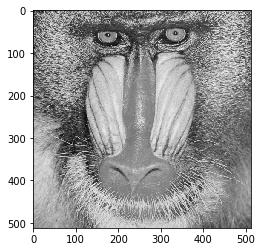

Aplicando filtro h1


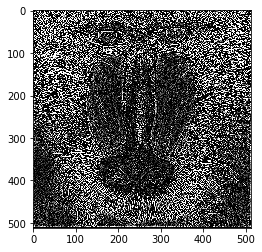

Aplicando filtro h2


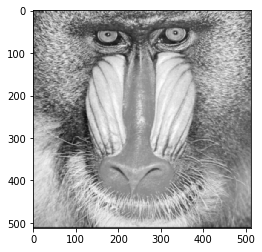

Aplicando filtro h3


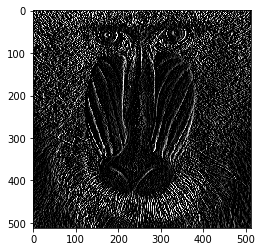

Aplicando filtro h4


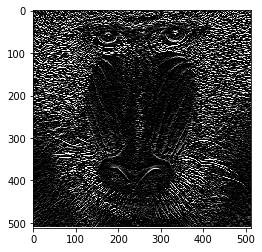

Aplicando h3 e h4 de forma combinada


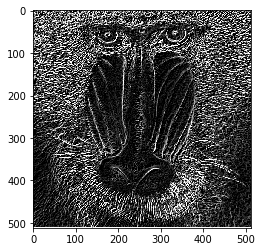

In [8]:
#Uma imagem do conjunto de imagens
img_name = 'baboon'
img = images[img_name]

print("imagem Original")
plt.imshow(img,cmap='gray')
plt.show()

results = {}

for (f_name, f) in filtros:
    print("Aplicando filtro {}".format(f_name))
    
    new_img = convolution(img,f)
    results[f_name] = new_img
    plt.imshow(new_img,cmap='gray')
    plt.imsave("./output/"+img_name+"_"+f_name+".png",new_img,cmap='gray')
    plt.show()

    
print("Aplicando h3 e h4 de forma combinada")

img_h3_h4 = np.sqrt(results['h3']**2 + results['h4']**2)
img_h3_h4 = rescale(img_h3_h4)

plt.imshow(img_h3_h4,cmap='gray')
plt.imsave("./output/"+img_name+"_h3_h4.png",img_h3_h4,cmap='gray')
plt.show()

imagem Original


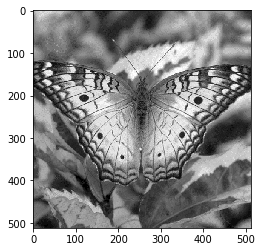

Aplicando filtro h1


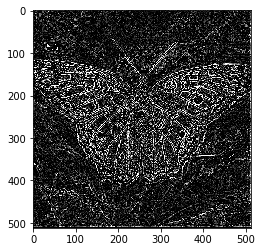

Aplicando filtro h2


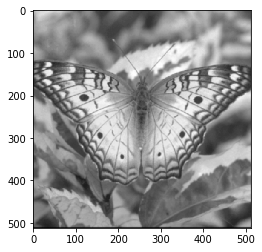

Aplicando filtro h3


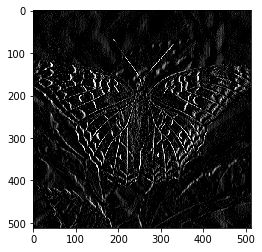

Aplicando filtro h4


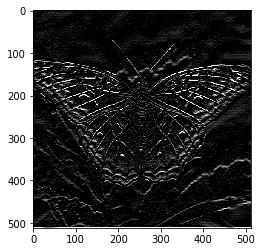

Aplicando h3 e h4 de forma combinada


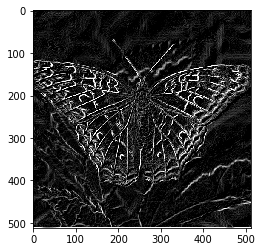

In [9]:
#Outra imagem do conjunto de imagens
img_name = 'butterfly'
img = images[img_name]

print("imagem Original")
plt.imshow(img,cmap='gray')
plt.show()

results = {}

for (f_name, f) in filtros:
    print("Aplicando filtro {}".format(f_name))
    
    new_img = convolution(img,f)
    results[f_name] = new_img
    plt.imshow(new_img,cmap='gray')
    plt.imsave("./output/"+img_name+"_"+f_name+".png",new_img,cmap='gray')
    plt.show()

    
print("Aplicando h3 e h4 de forma combinada")

img_h3_h4 = np.sqrt(results['h3']**2 + results['h4']**2)
img_h3_h4 = rescale(img_h3_h4)

plt.imshow(img_h3_h4,cmap='gray')
plt.imsave("./output/"+img_name+"_h3_h4.png",img_h3_h4,cmap='gray')
plt.show()

### 1.2

##### Funções auxiliares

In [10]:
def tranformada_fourier(img):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    #plt.subplot(121),plt.imshow(img, cmap = 'gray')
    #plt.title('Imagem de Entrada'), plt.xticks([]), plt.yticks([])
    #plt.subplot(122),plt.imshow(magnitude_spectrum[:,:,0], cmap = 'gray')
    #plt.title('Espectro de Magnitude'), plt.xticks([]), plt.yticks([])
    #plt.show()
    
    return fshift, magnitude_spectrum

In [11]:
# tranformada de fourier inversa 
def inverse_fourier(f):
    f_ishift = np.fft.ifftshift(f)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

In [12]:
def get_gaussian_filter(kernelsize, sigma=5):
    gaussian = signal.gaussian(kernelsize, std=sigma).reshape(kernelsize, 1)
    gaussian2 = np.outer(gaussian, gaussian)
    gaussian2 = gaussian2 / gaussian2.sum()
    return gaussian2

In [18]:
img_name = 'house'
img = images[img_name]

rows, cols = img.shape

#grau de suavização
sigma = 30

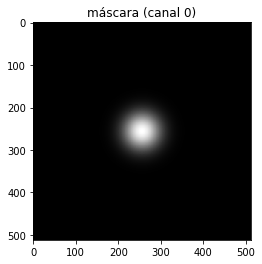

In [19]:
#Gera um filtro gaussiano
gaussian_filter = get_gaussian_filter(rows,sigma)

#gera a máscara // possui 2 canais, pois será aplicado no espectro
mask = np.zeros((rows,cols,2))

#Replica o filtro gaussiano nos dois canais da máscara
mask[:,:,0] = gaussian_filter
mask[:,:,1] = gaussian_filter
plt.imshow(mask[:,:,0],'gray'); plt.title('máscara (canal 0)'); plt.show()

In [20]:
# calcula DFT
dft_shift, magnitude_spectrum = tranformada_fourier(img)

/home/leodecio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


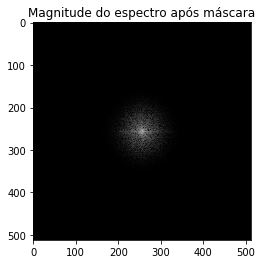

In [21]:
#aplica máscara no espectro
fshift = dft_shift * mask

#Espectro de magnitude após aplicar a Máscara
magnitude_spectrum = np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1])+1)

plt.imshow(magnitude_spectrum,'gray'); plt.title('Magnitude do espectro após máscara');
plt.show()

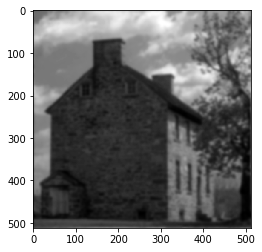

In [22]:
# reconstrói a imagem
img_back = inverse_fourier(fshift)

plt.imshow(img_back,'gray');
#plt.title('imagem reconstruída');
plt.imsave("./output/"+img_name+"_grau_suavização_{}.png".format(sigma),img_back,cmap='gray')
plt.show()